<a href="https://colab.research.google.com/github/bsivavenu/Google_Colab_Notebooks/blob/master/alpha_vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/RomelTorres/alpha_vantage.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 1753, done.
remote: Total 1753 (delta 0), reused 0 (delta 0), pack-reused 1753
Receiving objects: 100% (1753/1753), 994.72 KiB | 13.63 MiB/s, done.
Resolving deltas: 100% (1013/1013), done.
/content/cloned-repo
alpha_vantage  helpers	__init__.py  MANIFEST.in  setup.cfg  test_alpha_vantage
docs	       images	LICENSE.txt  README.md	  setup.py


In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

In [2]:
!pip install alpha_vantage pandas

# !

     |████████████████████████████████| 1.3MB 3.9MB/s 
     |████████████████████████████████| 143kB 16.4MB/s 
     |████████████████████████████████| 296kB 17.6MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=e76965b2c696b9d36348111bf20833662d034347b716d348784a029dbe529d86
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=02715303606e67cb55c6fd53e906ec0db8d058a653ba0aff8bb9b1df24a8bf77
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [13]:
from alpha_vantage.timeseries import TimeSeries
# ts = TimeSeries(key='TJWZCQLWRPCKNQBJ')
ts = TimeSeries(key='TJWZCQLWRPCKNQBJ',output_format='pandas')

# Get json object with the intraday data and another with  the call's metadata
# data, meta_data = ts.get_intraday('GOOGL')
data, meta_data = ts.get_intraday(symbol='A2M',interval='1min', outputsize='full')


ValueError: ignored

In [8]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-10-28 20:00:00,203.30,203.40,203.25,203.32,3337.0
2020-10-28 19:59:00,203.25,203.30,203.25,203.30,1939.0
2020-10-28 19:58:00,203.20,203.30,203.20,203.30,2729.0
2020-10-28 19:57:00,203.40,203.40,203.00,203.00,4990.0
2020-10-28 19:56:00,203.44,203.44,203.32,203.32,2231.0
...,...,...,...,...,...
2020-10-15 04:21:00,217.15,217.15,217.15,217.15,364.0
2020-10-15 04:17:00,217.02,217.15,217.02,217.15,459.0
2020-10-15 04:13:00,217.60,217.60,217.60,217.60,1199.0


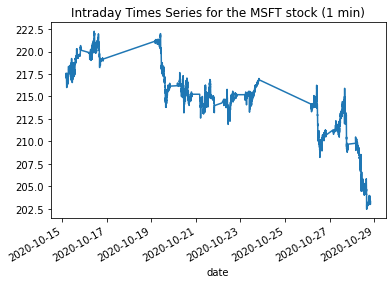

In [9]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

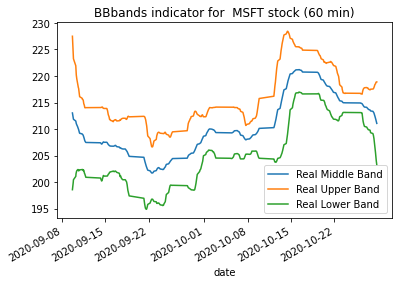

In [10]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

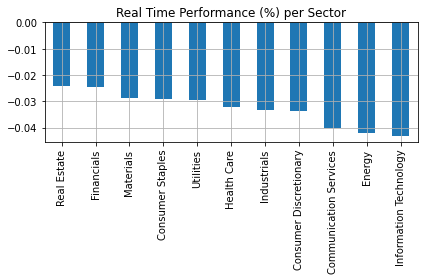

In [11]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [12]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries

symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']


async def get_data(symbol):
    ts = TimeSeries(key='YOUR_KEY_HERE')
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
loop.close()
print(results)

RuntimeError: ignored